In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
data = pd.read_csv(r"C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\pima-indians-diabetes-database/diabetes.csv")

In [12]:
data.head()

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  Unnamed: 10  
0   50  1.3790      True          NaN  
1   31  1.1426     False          NaN  
2   32  0.0000      True          NaN  
3   21  0.9062     False          NaN  
4   33  1.3790      True          NaN

In [13]:
data.shape
data.drop('Unnamed: 10', axis=1,inplace=True)

In [14]:
data.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [15]:
data.head()

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  
0   50  1.3790      True  
1   31  1.1426     False  
2   32  0.0000      True  
3   21  0.9062     False  
4   33  1.3790      True

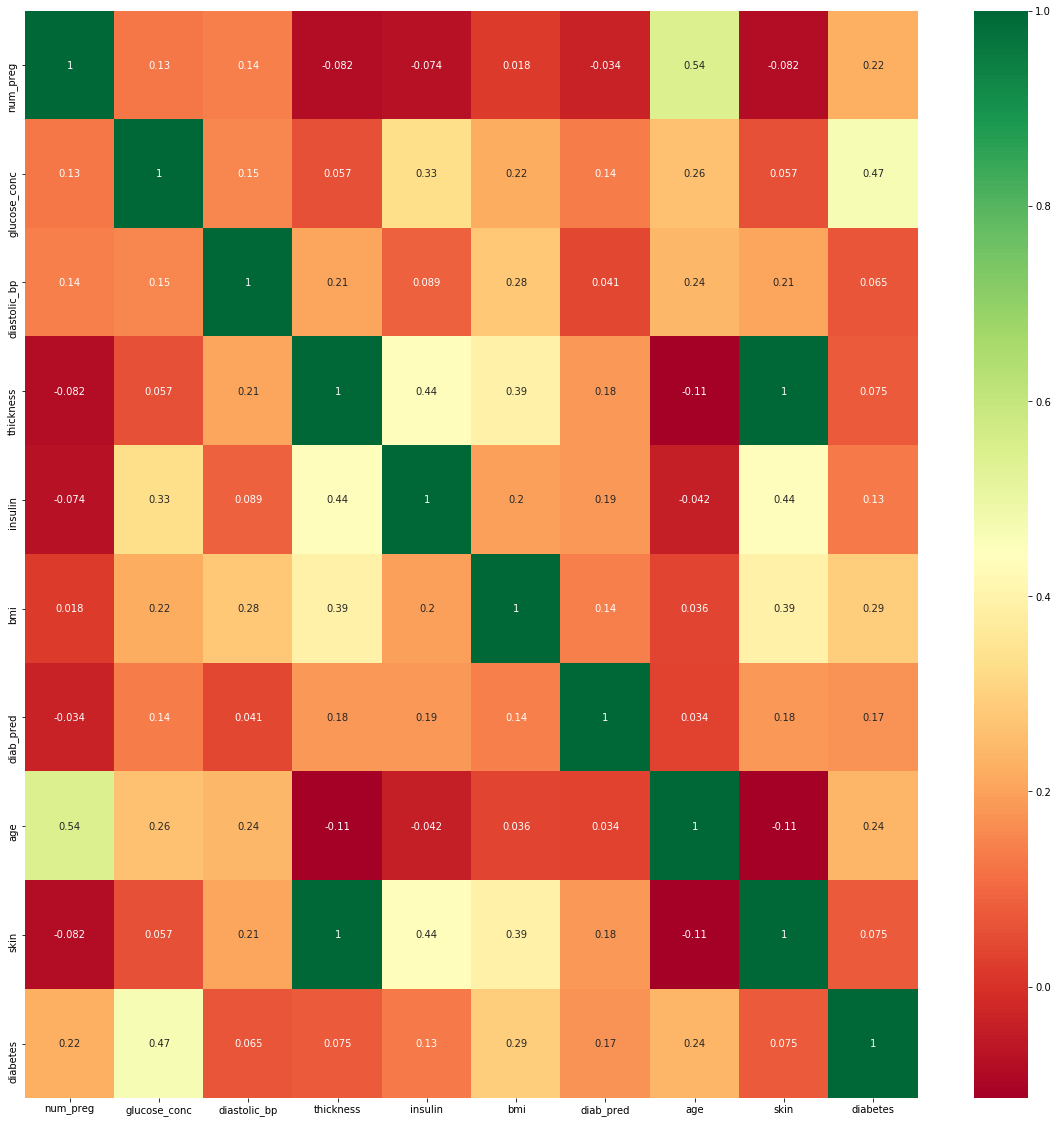

In [16]:
# CORREALATION CHECK
import seaborn as sns
import matplotlib.pyplot as plt
#GET CORRELATION OF EACH FEATURE IN DATASETS
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#PLOT HEAT MAP
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
data.corr()

num_preg  glucose_conc  diastolic_bp  thickness   insulin  \
num_preg      1.000000      0.129459      0.141282  -0.081672 -0.073535   
glucose_conc  0.129459      1.000000      0.152590   0.057328  0.331357   
diastolic_bp  0.141282      0.152590      1.000000   0.207371  0.088933   
thickness    -0.081672      0.057328      0.207371   1.000000  0.436783   
insulin      -0.073535      0.331357      0.088933   0.436783  1.000000   
bmi           0.017683      0.221071      0.281805   0.392573  0.197859   
diab_pred    -0.033523      0.137337      0.041265   0.183928  0.185071   
age           0.544341      0.263514      0.239528  -0.113970 -0.042163   
skin         -0.081672      0.057328      0.207371   1.000000  0.436783   
diabetes      0.221898      0.466581      0.065068   0.074752  0.130548   

                   bmi  diab_pred       age      skin  diabetes  
num_preg      0.017683  -0.033523  0.544341 -0.081672  0.221898  
glucose_conc  0.221071   0.137337  0.263514  0.057328  0.466581  
diastolic_bp  0.281805   0.041265  0.239528  0.207371  0.065068  
thickness     0.392573   0.183928 -0.113970  1.000000  0.074752  
insulin       0.197859   0.185071 -0.042163  0.436783  0.130548  
bmi           1.000000   0.140647  0.036242  0.392573  0.292695  
diab_pred     0.140647   1.000000  0.033561  0.183928  0.173844  
age           0.036242   0.033561  1.000000 -0.113970  0.238356  
skin          0.392573   0.183928 -0.113970  1.000000  0.074752  
diabetes      0.292695   0.173844  0.238356  0.074752  1.000000

In [18]:
diabetes_map = {True: 1, False: 0}

In [19]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [20]:
data.head()

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  
0   50  1.3790         1  
1   31  1.1426         0  
2   32  0.0000         1  
3   21  0.9062         0  
4   33  1.3790         1

In [21]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes']] == True)

In [22]:
(diabetes_true_count , diabetes_false_count)

(268, 768)

In [24]:
X = data.drop('diabetes',axis=1)
y = data['diabetes']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [23]:
# Check how many other missing(zero) values
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [26]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)


In [28]:
#APPLY ALGORITHMS

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [29]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics
print("Accuracy = {0:3f}".format(metrics.accuracy_score(y_test,predict_train_data)))


Accuracy = 0.727273


In [30]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [31]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [32]:
import xgboost

In [33]:
classifier=xgboost.XGBClassifier()

In [34]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [35]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [36]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.3s finished



 Time taken: 0 hours 0 minutes and 10.78 seconds.


In [37]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
       learning_rate=0.2, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [39]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [40]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

C:\Users\UX009405\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\UX009405\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\UX009405\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\UX009405\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocess

In [41]:
score

array([0.75324675, 0.74025974, 0.74025974, 0.64935065, 0.66233766,
       0.76623377, 0.75324675, 0.80519481, 0.77631579, 0.80263158])

In [42]:
score.mean()

0.7449077238550922